In [2]:
# This file will use the csv data located in the file and conduct an analysis on it. 
# The csv file has 4 columns, which include sine wave data. 
# This data is from the following forum post: https://robonationforum.vbulletin.net/forum/robosub/-2020-robosub/3113-sample-hydrophone-data

# PREMISE 
# There is an acoustic pinger located some distance away from an autonomous submarine in some body of water. 
# The pinger pings at certain intervals, emitting a wave with x frequency and y amplitude. 
# The baseline amplitude is measured at a distance of z away from the pinger under ideal conditions. 
# The submarine has 4 hydrophones which are listening for pulses. They are a known distance away from each other in a certain configuration. 
# The data to the hydrophones must be used to figure out the autonomous submarine's position in relation to the acoustic pinger. 

# SPECIFICATIONS 
# Pinger Being Used: 
# Sampling Rate for Each Hydrophone: 250000 samples per second. 
# Hydrophones are located on the corners of a 15 mm square. Each side of the square is 15mm, so the positions of the hydrophones are as follows. 
# Hydrophone 1: (7.5 mm, 7.5 mm)
# Hydrophone 2: (-7.5 mm, 7.5 mm)
# Hydrophone 3: (-7.5 mm, -7.5 mm)
# Hydrophone 4: (7.5 mm, -7.5 mm)

import pandas as pd
import numpy as np
from pathlib import Path

# The load_hydrophone_data function opens a CSV file. 
def load_hydrophone_data():
    return pd.read_csv(Path("./sampleData1/1.csv"), header = None)

hydrophoneData = load_hydrophone_data()
hydrophoneData.head()                                  # Gives first couple of lines of the csv

,0,1,2,3,4
0,-0.333863,-0.130310,0.581665,0.252381,0
1,-0.571900,-0.387574,0.679322,0.166931,1
2,-0.588379,-0.499878,0.295410,-0.138245,2
3,-0.431824,-0.582886,-0.359497,-0.449829,3
4,-0.288696,-0.663147,-0.852357,-0.590210,4


In [3]:
# Cleaning up the CSV File 

def addTime(x): 
    return x / 250000

hydrophoneData.columns = ['hydrophone1', 'hydrophone2', 'hydrophone3', 'hydrophone4', 'time'] 
hydrophoneData["time"] = hydrophoneData["time"].apply(addTime)

hydrophoneData

,hydrophone1,hydrophone2,hydrophone3,hydrophone4,time
0,-0.333863,-0.130310,0.581665,0.252381,0.000000
1,-0.571900,-0.387574,0.679322,0.166931,0.000004
2,-0.588379,-0.499878,0.295410,-0.138245,0.000008
3,-0.431824,-0.582886,-0.359497,-0.449829,0.000012
4,-0.288696,-0.663147,-0.852357,-0.590210,0.000016
...,...,...,...,...,...
1048571,-0.208435,-0.254822,-0.172730,-0.195923,4.194284
1048572,-0.258484,-0.287476,-0.170593,-0.169678,4.194288
1048573,-0.295105,-0.243530,-0.176392,-0.206909,4.194292
1048574,-0.296631,-0.167847,-0.181885,-0.280152,4.194296


<AxesSubplot: xlabel='time'>

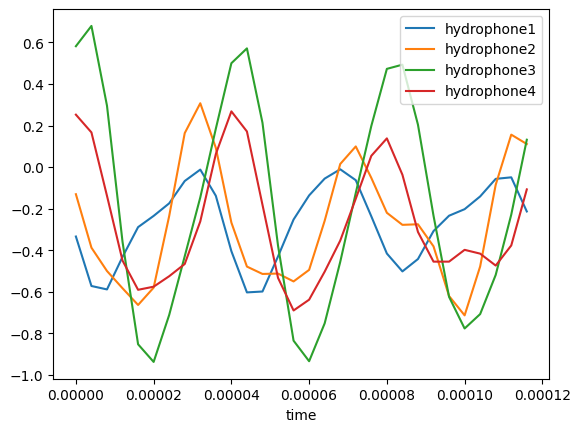

In [4]:
# Takes the first 30 samples from each of the hydrophones and stores them in shortenedHydrophoneData for analysis. 

shortenedHydrophoneData = hydrophoneData.iloc[:30, :]
shortenedHydrophoneData = pd.DataFrame(shortenedHydrophoneData)

shortenedHydrophoneData.plot(x = 'time')

In [5]:
shortened2HydrophoneData = hydrophoneData.iloc[:5000, 0]
shortened2HydrophoneData = np.array(shortened2HydrophoneData)

shortened2HydrophoneData

array([-0.333863, -0.5719  , -0.588379, ...,  0.242005,  0.270386,
       -0.031738])

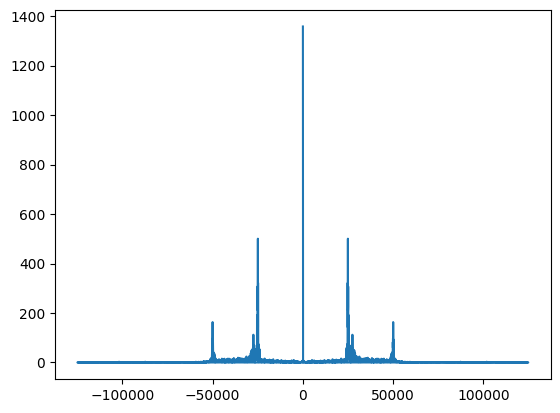

In [6]:
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = 5000

yf = fft(shortened2HydrophoneData)
xf = fftfreq(N, 1 / 250000)

plt.plot(xf, np.abs(yf))
plt.show()

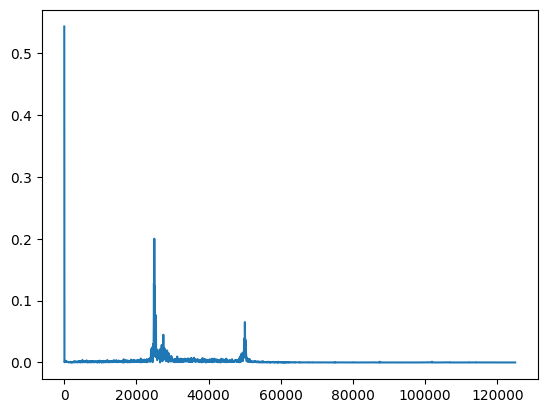

In [7]:
# Discrete Fourier Transform (From Scratch) 

import math

N = 5000                                      # Number of Samples 
sampling_freq = 250000                      # Sampling Frequency 
freq_resolution = sampling_freq / N         # Frequency Resolution 
data = shortened2HydrophoneData             # Data in Array 

# # Example Data from Video (https://www.youtube.com/watch?v=mkGsMWi_j4Q)
# N = 16                                                   # Number of Samples 
# sampling_freq = 8                                       # Sampling Frequency 
# freq_resolution = sampling_freq / N                     # Frequency Resolution 
# data = [0, 0.707, 1, 0.707, 0, -0.707, -1, -0.707, 0, 0.707, 1, 0.707, 0, -0.707, -1, -0.707]      # Data in Array 

bin_width = sampling_freq / N
frequency_bins = []

# Creates a list of frequency bins 
counter = 0
for i in range(N):
    frequency_bins.append(counter)
    counter = counter + bin_width

# Main discrete fourier transform 
final_data = []

for i in range(N):
    real = 0
    complex = 0

    for j in range(N):
        
        real = real + data[j] * math.cos(-2 * math.pi * i * j / N)
        complex = complex + data[j] * math.sin(-2 * math.pi * i * j / N)
    
    temporary = [real, complex]
    final_data.append(temporary)

# Finds magnitude for each frequency bin and places into a new array
magnitude_array = []

for x in final_data: 
    magnitude = math.sqrt((x[0])**2 + (x[1])**2)
    magnitude_array.append(magnitude)

# Finds Phase Shift for each frequency bin and places into a new array 
phase_shift_array = []

for x in final_data:
    phase_shift = math.atan(x[1] / x[0])
    phase_shift_array.append(phase_shift)

# Deals with the Nyquist Limit 
magnitude_array_nyquist = []

for x in range(len(magnitude_array) // 2):
    magnitude_array_nyquist.append((magnitude_array[x] * 2) / N)

frequency_bins_nyquist = []

for x in range(len(frequency_bins) // 2):
    frequency_bins_nyquist.append(frequency_bins[x])

# Plots the Magnitude Data 
plt.plot(frequency_bins_nyquist, magnitude_array_nyquist)

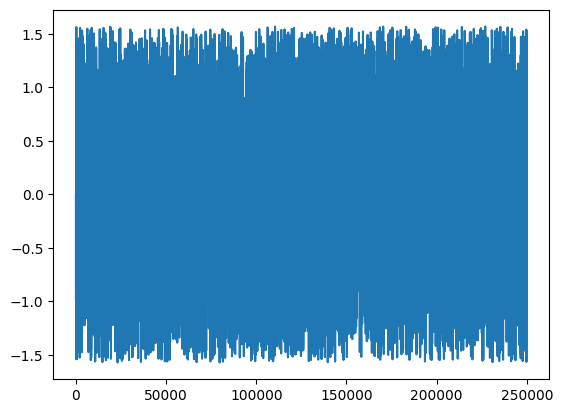

In [8]:
plt.plot(frequency_bins, phase_shift_array)

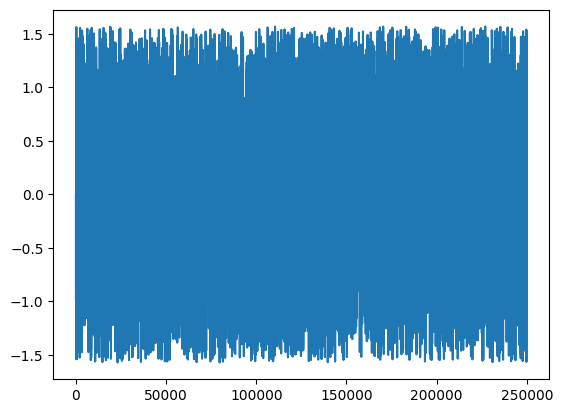

In [9]:
# Finds Phase Shift for each frequency bin and places into a new array 
phase_shift_array = []

for x in final_data:
    phase_shift = math.atan(x[1] / x[0])
    phase_shift_array.append(phase_shift)

plt.plot(frequency_bins, phase_shift_array)